
### 1. انتخاب مجموعه داده‌های شبکه:

**شبکه اجتماعی:** مجموعه داده‌های توییتر که تعاملات کاربران را نشان می‌دهد.
- **گره‌ها:** کاربران توییتر
- **یال‌ها:** توییت‌هایی که کاربران یکدیگر را منشن یا ریتوییت کرده‌اند.

**شبکه حمل‌ونقل:** مجموعه داده‌های شبکه متروی توکیو که ایستگاه‌ها و خطوط را نشان می‌دهد.
- **گره‌ها:** ایستگاه‌های مترو
- **یال‌ها:** خطوط اتصال بین ایستگاه‌ها

**شبکه بیولوژیکی:** مجموعه داده‌های تعامل پروتئین-پروتئین در موجودات زنده.
- **گره‌ها:** پروتئین‌ها
- **یال‌ها:** تعاملات بین پروتئین‌ها

### 2. تفسیر انتخاب هر مجموعه داده:

- **شبکه اجتماعی:** بررسی چگونگی تشکیل جوامع، تاثیرگذاران، و گسترش اطلاعات.
- **شبکه حمل‌ونقل:** تحلیل کارایی، مسیرهای پرتردد و آسیب‌پذیری‌های شبکه.
- **شبکه بیولوژیکی:** فهمیدن ساختار و پویایی‌های تعاملات پروتئینی و نقش آن‌ها در بیماری‌ها.

### 3. تحلیل موردی برای دو شبکه:

درک و تحلیل شبکه‌ها می‌تواند بینش‌های گوناگونی را در اختیار ما قرار دهد. برای هر یک از انواع شبکه‌های مورد بحث (اجتماعی، حمل‌ونقل و بیولوژیکی)، می‌توان اهداف تحلیلی خاصی را تعیین کرد:

1. **شبکه اجتماعی:**
   - **شناسایی افراد تاثیرگذار (Influencer Identification):** در شبکه‌های اجتماعی، تشخیص افرادی که بیشترین تأثیر را بر دیگران دارند می‌تواند برای بازاریابی، اطلاع‌رسانی و مدیریت افکار عمومی مفید باشد.
   - **جامعه‌یابی (Community Detection):** شناسایی گروه‌ها یا جوامع درون شبکه که بر اساس علایق، روابط یا تعاملات مشترک شکل گرفته‌ان

د می‌تواند برای درک بهتر ساختار و دینامیک‌های شبکه کاربرد داشته باشد.

2. **شبکه حمل‌ونقل:**
   - **بهینه‌سازی مسیر (Route Optimization):** یافتن کوتاه‌ترین مسیرها یا بهینه‌سازی جریان ترافیک برای کاهش زمان سفر و بهبود کارایی شبکه.
   - **تحلیل آسیب‌پذیری (Vulnerability Analysis):** شناسایی نقاط کلیدی یا آسیب‌پذیر در شبکه که می‌تواند تأثیر قابل توجهی بر عملکرد کلی شبکه داشته باشد.

3. **شبکه بیولوژیکی:**
   - **تحلیل مسیرهای سیگنالینگ (Signaling Pathways Analysis):** شناسایی مسیرهای سیگنالینگ و ارتباطات کلیدی بین پروتئین‌ها که می‌تواند درک ما را از فرآیندهای بیولوژیکی و بیماری‌ها عمیق‌تر کند.
   - **تعیین مرکزیت پروتئین‌ها (Protein Centrality Analysis):** شناسایی پروتئین‌های حیاتی که در شبکه‌های بیولوژیکی نقش مرکزی دارند و می‌توانند هدف‌های دارویی مهمی باشند.

### 4. نمایش بصری هر سه شبکه:

برای نمایش گراف هر شبکه، استفاده از کتابخانه‌های `networkx` و `matplotlib` اساسی است. این کتابخانه‌ها به ما امکان می‌دهند تا گراف‌ها را به صورت بصری و قابل فهم نمایش دهیم.



In [2]:
import networkx as nx
import pandas as pd
import numpy as np

# Generate a simple social network
social_network = nx.erdos_renyi_graph(10, 0.3)
social_df = pd.DataFrame(social_network.edges(), columns=["Source", "Target"])
social_df["Weight"] = np.random.randint(1, 5, social_df.shape[0])

# Generate a simple transportation network
transport_network = nx.erdos_renyi_graph(8, 0.4, directed=True)
transport_df = pd.DataFrame(transport_network.edges(), columns=["Source", "Target"])
transport_df["Weight"] = np.random.randint(5, 15, transport_df.shape[0])

# Generate a simple biological network
biological_network = nx.barabasi_albert_graph(12, 2)
biological_df = pd.DataFrame(biological_network.edges(), columns=["Source", "Target"])
biological_df["Weight"] = np.random.uniform(0.1, 1.0, biological_df.shape[0])

# Save to CSV files
social_file_path = "social_network_sample.csv"
transport_file_path = "transport_network_sample.csv"
biological_file_path = "biological_network_sample.csv"

social_df.to_csv(social_file_path, index=False)
transport_df.to_csv(transport_file_path, index=False)
biological_df.to_csv(biological_file_path, index=False)

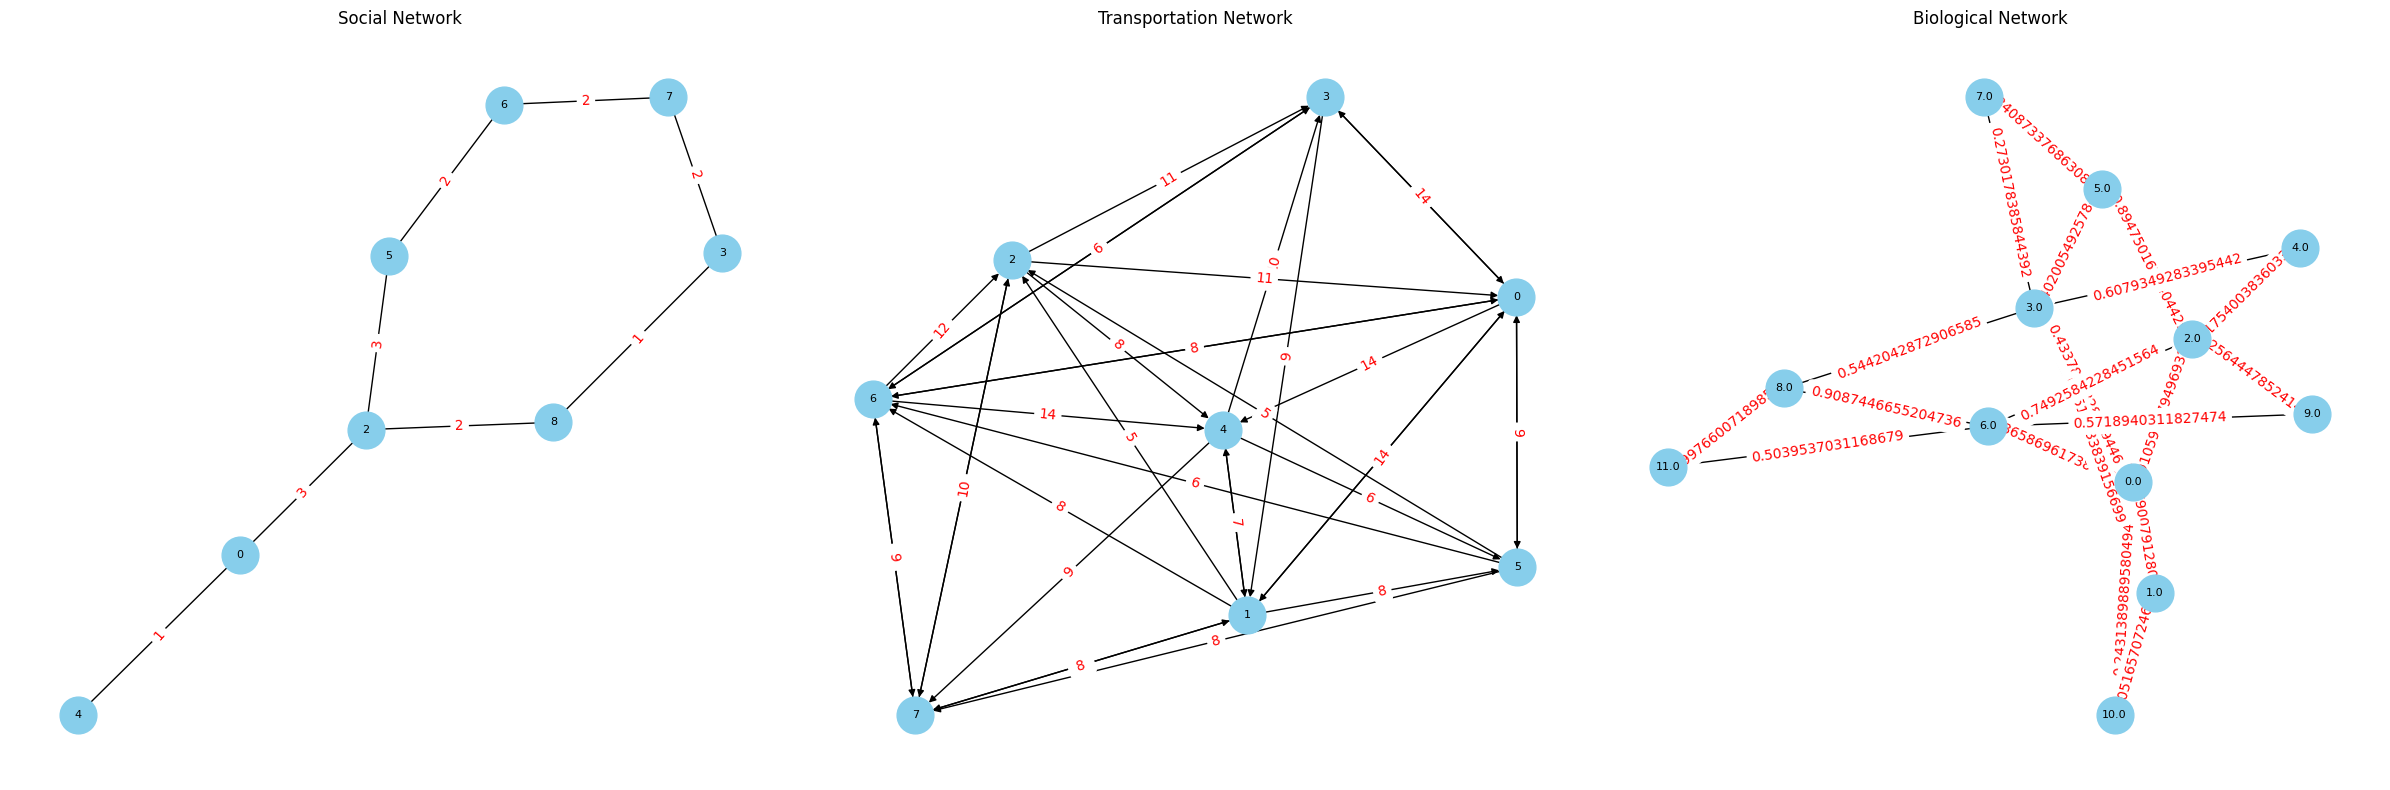

In [4]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt


# Function to create a graph object from a dataframe
def create_graph_from_df(df, is_directed=False):
    # Create a graph object
    G = nx.DiGraph() if is_directed else nx.Graph()

    # Add edges and weights
    for idx, row in df.iterrows():
        G.add_edge(row["Source"], row["Target"], weight=row["Weight"])

    return G


# Function to plot a graph in a subplot
def plot_graph(G, pos, ax, title):
    # Draw the graph
    nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=8, ax=ax)

    # Draw edge labels
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color="red", ax=ax)

    # Set title
    ax.set_title(title)


# Load datasets from CSV
social_df = pd.read_csv("social_network_sample.csv")
transport_df = pd.read_csv("transport_network_sample.csv")
biological_df = pd.read_csv("biological_network_sample.csv")

# Create graph objects
social_network = create_graph_from_df(social_df)
transport_network = create_graph_from_df(transport_df, is_directed=True)
biological_network = create_graph_from_df(biological_df)

# Create positions for each graph
pos_social = nx.spring_layout(social_network)
pos_transport = nx.spring_layout(transport_network)
pos_biological = nx.spring_layout(biological_network)

# Create a subplot for each graph
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 8))

# Plot each graph
plot_graph(social_network, pos_social, ax1, "Social Network")
plot_graph(transport_network, pos_transport, ax2, "Transportation Network")
plot_graph(biological_network, pos_biological, ax3, "Biological Network")

plt.tight_layout()
plt.show()


1. **گراف شبکه اجتماعی (Social Network):**
   - این گراف نمایش‌دهنده یک شبکه اجتماعی ساده است که در آن گره‌ها کاربران و یال‌ها نشان‌دهنده ارتباطات بین کاربران هستند، مانند منشن‌ها یا ریتوییت‌ها در توییتر.
   - یال‌ها وزن‌دار هستند که این وزن‌ها می‌توانند نشان‌دهنده تعداد بار تعامل بین دو کاربر باشند.
   - گراف غیرجهت‌دار است که نشان‌دهنده ارتباطات دوطرفه بین کاربران است.

2. **گراف شبکه حمل‌ونقل (Transportation Network):**
   - این گراف شبیه‌سازی یک شبکه حمل‌ونقل عمومی است که در آن ایستگاه‌ها به عنوان گره‌ها و مسیرهای بین ایستگاه‌ها به عنوان یال‌ها در نظر گرفته می‌شوند.
   - یال‌ها در این شبکه وزن‌دار هستند که می‌توانند نشان‌دهنده زمان سفر یا فاصله بین ایستگاه‌ها باشند.
   - گراف جهت‌دار است، که این جهت نشان‌دهنده جهت حرکت بین ایستگاه‌ها است و می‌تواند نشان‌دهنده جریان مسافران یا کالا باشد.

3. **گراف شبکه بیولوژیکی (Biological Network):**
   - این گراف یک شبکه بیولوژیکی را نمایش می‌دهد که در آن گره‌ها می‌توانند پروتئین‌ها، آنزیم‌ها، یا سایر مولکول‌های بیولوژیکی باشند و یال‌ها نشان‌دهنده تعاملات یا مسیرهای ارتباطی بین این مولکول‌ها هستند.
   - یال‌های این گراف وزن‌دار هستند، که این وزن‌ها می‌توانند نشان‌دهنده شدت یا اهمیت تعاملات بین مولکول‌ها باشند.
   - گراف غیرجهت‌دار است که نمایانگر تعاملات دوطرفه بین مولکول‌های بیولوژیکی است.

